In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [2]:
dataframe = pd.read_csv('Flipkart_Dataset.csv')
dataframe.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


# Data Cleaning

In [4]:
# Ckeck for the null values

dataframe.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [5]:
# drop the null values

dataframe.dropna(inplace=True, axis=0)

In [6]:
# Sorting Reviews into descending order and having looks on counts

reviews = dataframe['Review'].value_counts().sort_values(ascending=False)
reviews[:10]

wonderful            9014
not specified        8351
brilliant            5643
awesome              5636
great product        5621
classy product       5602
worth every penny    5599
perfect product!     5598
simply awesome       5595
super!               5586
Name: Review, dtype: int64

## Feature Engineering (Removing errors from the data)

#### Remove Stop Words Remove the stopwords like "a", "the", "I" etc. Remove symbols and special characters. We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
#### Tokenize We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
#### Stemming -Remove the suffixes from the words to get the root form of the word. e.g 'Wording' --> "Word"

In [7]:
dataframe['Rate'].value_counts()

5                                                                    105641
4                                                                     36966
1                                                                     18294
3                                                                     14024
2                                                                      5451
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)              1
Bajaj DX 2 L/W Dry Iron                                                   1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)         1
Name: Rate, dtype: int64

In [8]:
dataframe = dataframe[(dataframe.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & 
                      (dataframe.Rate != "Bajaj DX 2 L/W Dry Iron") & 
                      (dataframe.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

In [9]:
dataframe['Rate'].value_counts()

5    105641
4     36966
1     18294
3     14024
2      5451
Name: Rate, dtype: int64

In [10]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

stops = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rwagh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#apply review_to_words function on reviews
dataframe['Review'] = dataframe['Review'].apply(review_to_words)

C:\Users\rwagh\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


## EDA (Data Visualization)

C:\Users\rwagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


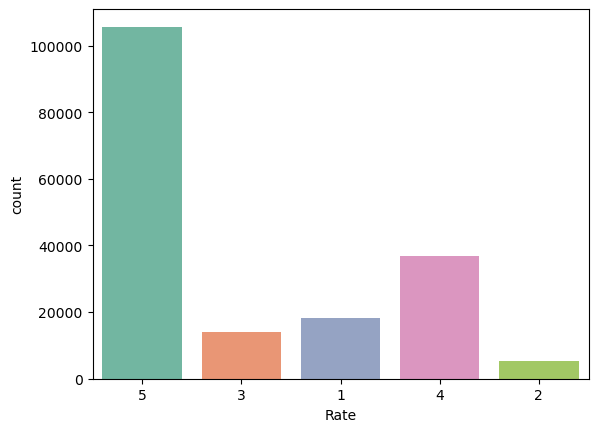

In [13]:
sns.countplot(dataframe['Rate'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

(array([34969., 21051., 31436., 15661., 32021., 13218.,  8511.,  9053.,
         6813.,  7643.]),
 array([  0. ,  47.5,  95. , 142.5, 190. , 237.5, 285. , 332.5, 380. ,
        427.5, 475. ]),
 <BarContainer object of 10 artists>)

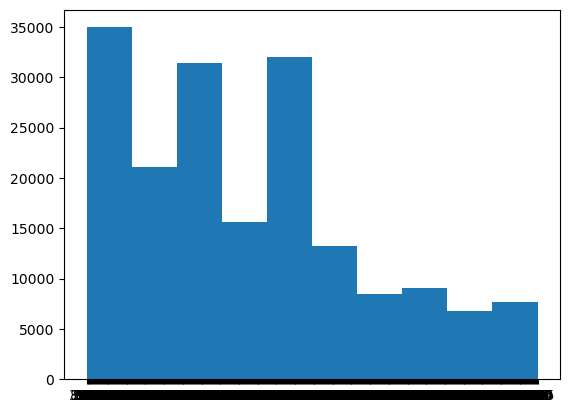

In [14]:
plt.hist(dataframe['product_price'])

C:\Users\rwagh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


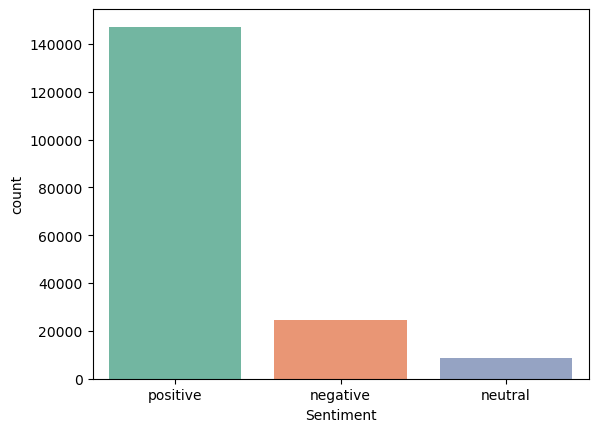

In [15]:
sns.countplot(dataframe['Sentiment'],palette ='Set2')
plt.ylabel=('count')
plt.xlabel=('Sentiments')
plt.show()

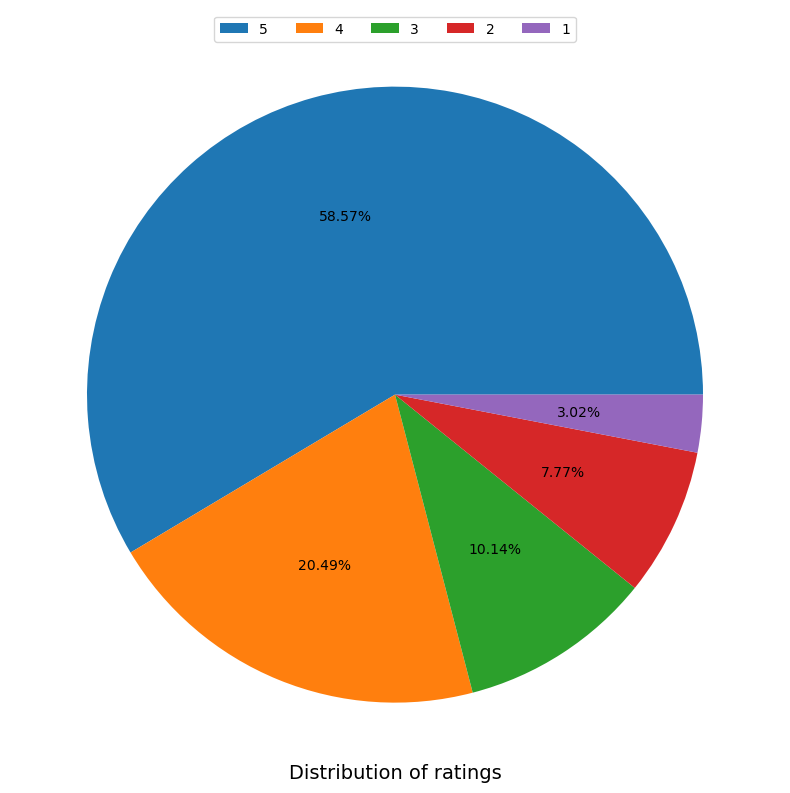

In [16]:
plt.figure(figsize = (10, 10))
label=[5,4,3,2,1]
plt.pie(dataframe['Rate'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=5, loc=9)
plt.title('Distribution of ratings', size=14, y=-0.01)
plt.show()

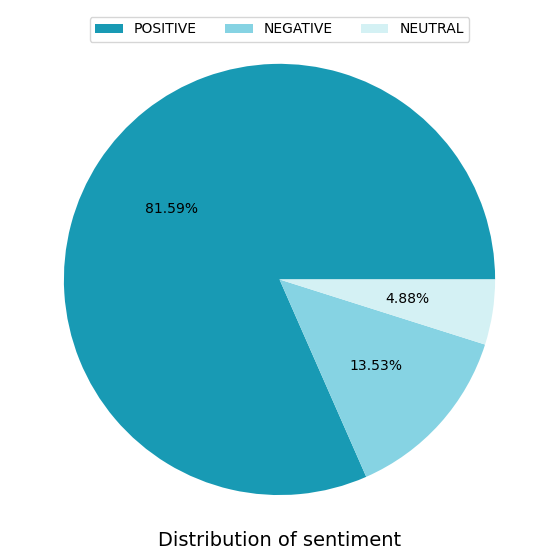

In [17]:
plt.figure(figsize = (7, 7))

labels = ['POSITIVE', 'NEGATIVE','NEUTRAL']
colors = ['#189AB4', '#86D3E3','#D4F1F4']
plt.pie(dataframe['Sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=3, loc=9)
plt.show()

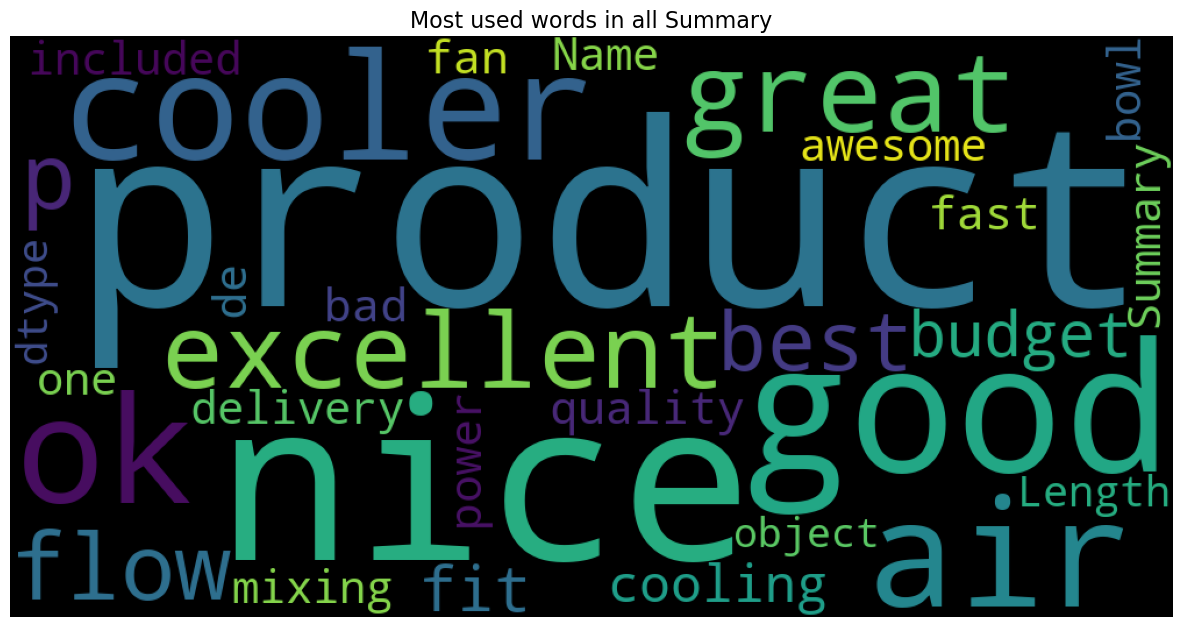

In [20]:
!pip install wordcloud
# get all used words 
# = pd.Series(' '.join(data['reviews.text']).split())
all_words =pd.Series(' '.join(str(dataframe['Summary']).split()))

# plot word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all Summary", size=16)

plt.axis("off")
plt.show()

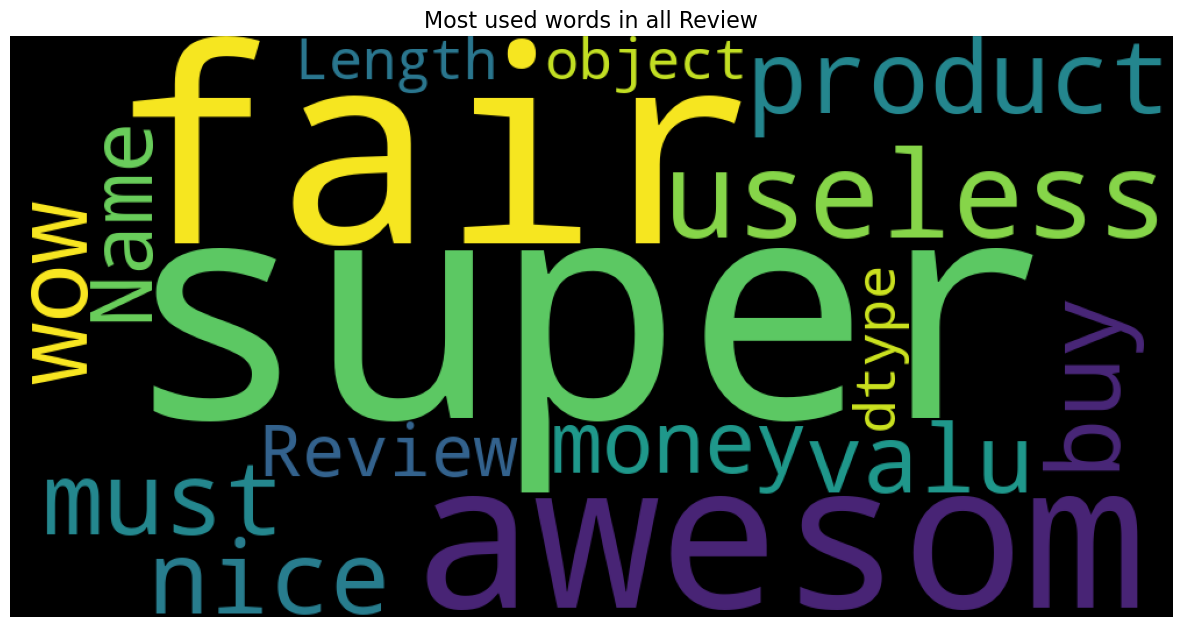

In [21]:
all_words =pd.Series(' '.join(str(dataframe['Review']).split()))

# plot word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all Review", size=16)

plt.axis("off")
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder

# apply label encoding to the sentiment column
encoder = LabelEncoder()
dataframe['sentiment_encoded'] = encoder.fit_transform(dataframe['Sentiment'])

# Model Building

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [50]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(dataframe.Review)
reviews_corpus.shape

(180376, 1011)

In [51]:
#dependent feature
sentiment = dataframe['sentiment_encoded']
sentiment.shape

(180376,)

### Split data into dependent and independent features

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.30,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (126263, 1011) (126263,)
Test data shape  (54113, 1011) (54113,)


# Multinomial Naive Bayes

In [62]:
clf_MNB = MultinomialNB().fit(X_train, Y_train)

pred = clf_MNB.predict(X_test)
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test))
mnb_acc = str(clf_MNB.score(X_test, Y_test)*100)
print(mnb_acc)

Confusion Matrix
[[ 5257   468   480]
 [   26     4    84]
 [ 2077  2194 43523]]
90.15208914678543


# Random Forest Classifier

In [63]:

clf_RF = RandomForestClassifier().fit(X_train, Y_train)

pred = clf_RF.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))
rf_acc =  str(clf_RF.score(X_test, Y_test)*100)
print(rf_acc)

Confusion Matrix
[[ 5544   490   480]
 [    0     0     2]
 [ 1816  2176 43605]]
90.82660358878643


# Support Vector Machine Classifier

In [64]:
clf_SVC = LinearSVC().fit(X_train, Y_train)

pred = clf_SVC.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))
svc_acc = str(clf_SVC.score(X_test, Y_test)*100)
print(svc_acc)

Confusion Matrix
[[ 5547   491   484]
 [    1     0     1]
 [ 1812  2175 43602]]
90.82660358878643


# Decision Tree Classifier

In [65]:
clf_DTC = DecisionTreeClassifier().fit(X_train, Y_train)

pred = clf_DTC.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

dtc_acc =  str(clf_DTC.score(X_test, Y_test)*100)
print(dtc_acc)

Confusion Matrix
[[ 5551   491   497]
 [    0     0     9]
 [ 1809  2175 43581]]
90.79518784765213


# Logistic Regression Classifier

In [66]:
clf_LRC = LogisticRegression().fit(X_train, Y_train)

pred = clf_LRC.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

lrc_acc =  str(clf_LRC.score(X_test, Y_test)*100)
print(lrc_acc)

Confusion Matrix
[[ 5542   489   474]
 [    0     0     0]
 [ 1818  2177 43613]]
90.83769149742206


C:\Users\rwagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
!pip install PrettyTable

from prettytable import PrettyTable
Summary = PrettyTable(["Model Name", "Accuracy in %"])
Summary.add_row(["Multinominal Naive Bayes", "{:.2f}".format(float(mnb_acc))])
Summary.add_row(["Random Forest Classifier", "{:.2f}".format(float(rf_acc))])
Summary.add_row(["Support Vector Machine Classifier", "{:.2f}".format(float(svc_acc))])
Summary.add_row(["Decision Tree Classifier", "{:.2f}".format(float(dtc_acc))])
Summary.add_row(["Logistic Regression Classifier", "{:.2f}".format(float(lrc_acc))])


print(Summary)

+-----------------------------------+---------------+
|             Model Name            | Accuracy in % |
+-----------------------------------+---------------+
|      Multinominal Naive Bayes     |     90.15     |
|      Random Forest Classifier     |     90.83     |
| Support Vector Machine Classifier |     90.83     |
|      Decision Tree Classifier     |     90.80     |
|   Logistic Regression Classifier  |     90.84     |
+-----------------------------------+---------------+
